In [15]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
con = duckdb.connect('../github_stars.db')

In [17]:
query_stars = """
SELECT *
FROM repo_stars_daily as d
JOIN repo_stars_monthly as m
ON d.repo_id = m.repo_id
"""

df_stars = con.sql(query_stars).df() 

# Stars

In [18]:
df_stars['event_period'] = pd.to_datetime(df_stars['event_period'])
df_stars['event_period_1'] = pd.to_datetime(df_stars['event_period_1'])

In [19]:
cumul_stars_repo1 = df_stars[['repo_id', 'event_period', 'cumul_count']].drop_duplicates()
cumul_stars_repo1['event_period'] = pd.to_datetime(cumul_stars_repo1['event_period']) 
cumul_stars_repo1 = cumul_stars_repo1.sort_values(['repo_id', 'event_period']) 
cumul_stars_repo1['smoothed_daily'] = cumul_stars_repo1.groupby('repo_id')['cumul_count'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())


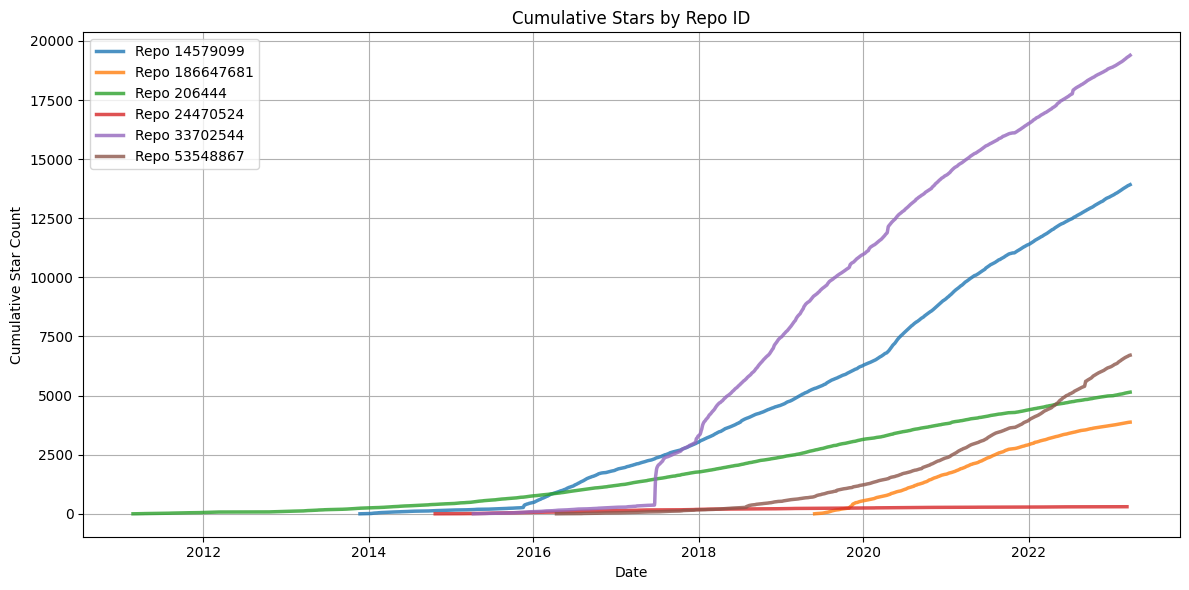

In [20]:
plt.figure(figsize=(12, 6))
for repo_id in cumul_stars_repo1['repo_id'].unique():
    user_daily = cumul_stars_repo1[cumul_stars_repo1['repo_id'] == repo_id]
    plt.plot(user_daily['event_period'], user_daily['smoothed_daily'], 
             label=f'Repo {repo_id}', alpha=0.8, linewidth=2.5)


plt.title('Cumulative Stars by Repo ID')
plt.xlabel('Date')
plt.ylabel('Cumulative Star Count')
plt.xticks()
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Commits

In [21]:
query_commits = """
SELECT *
FROM repo_commits_daily as d
JOIN repo_commits_monthly as m
ON d.repo_id = m.repo_id
"""

df_commits = con.sql(query_commits).df() 

In [22]:
df_commits['event_period'] = pd.to_datetime(df_commits['event_period'])
df_commits['event_period_1'] = pd.to_datetime(df_commits['event_period_1'])

In [23]:
cumul_commits_repo1 = df_commits[['repo_id', 'event_period', 'cumul_count']].drop_duplicates()
cumul_commits_repo1['event_period'] = pd.to_datetime(cumul_commits_repo1['event_period']) 
cumul_commits_repo1 = cumul_commits_repo1.sort_values(['repo_id', 'event_period'])  
cumul_commits_repo1['smoothed_daily'] = cumul_commits_repo1.groupby('repo_id')['cumul_count'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

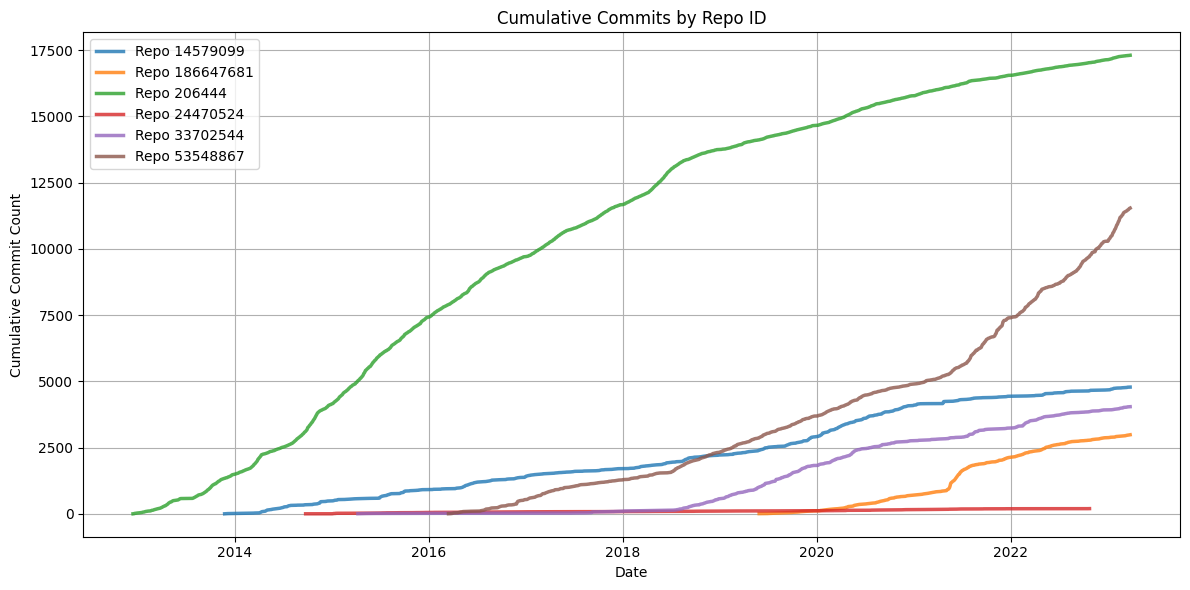

In [24]:
plt.figure(figsize=(12, 6))
for repo_id in cumul_commits_repo1['repo_id'].unique():
    user_daily = cumul_commits_repo1[cumul_commits_repo1['repo_id'] == repo_id]
    plt.plot(user_daily['event_period'], user_daily['smoothed_daily'], 
             label=f'Repo {repo_id}', alpha=0.8, linewidth=2.5)
    
plt.title('Cumulative Commits by Repo ID')
plt.xlabel('Date')
plt.ylabel('Cumulative Commit Count')
plt.xticks()
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
